By default, Prophet uses a linear model for its forecast

When forecasting growth, there is usually some maximum achievable point: total market size, total population size, etc.

This is called the carrying capacity, and the forecast should saturate at this point.

Prophet allows you to make forecasts using a logistic growth trend model, with a specified carrying capacity. 

In [4]:
import pandas as pd
from prophet import Prophet

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv"
)

In [3]:
df["cap"] = 8.5

In [5]:
m = Prophet(growth="logistic")
m.fit(df)

03:23:34 - cmdstanpy - INFO - Chain [1] start processing
03:23:35 - cmdstanpy - INFO - Chain [1] done processing


d:\Development\Processing\Batch\Spark\PySpark\PysparkProphet\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
d:\Development\Processing\Batch\Spark\PySpark\PysparkProphet\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


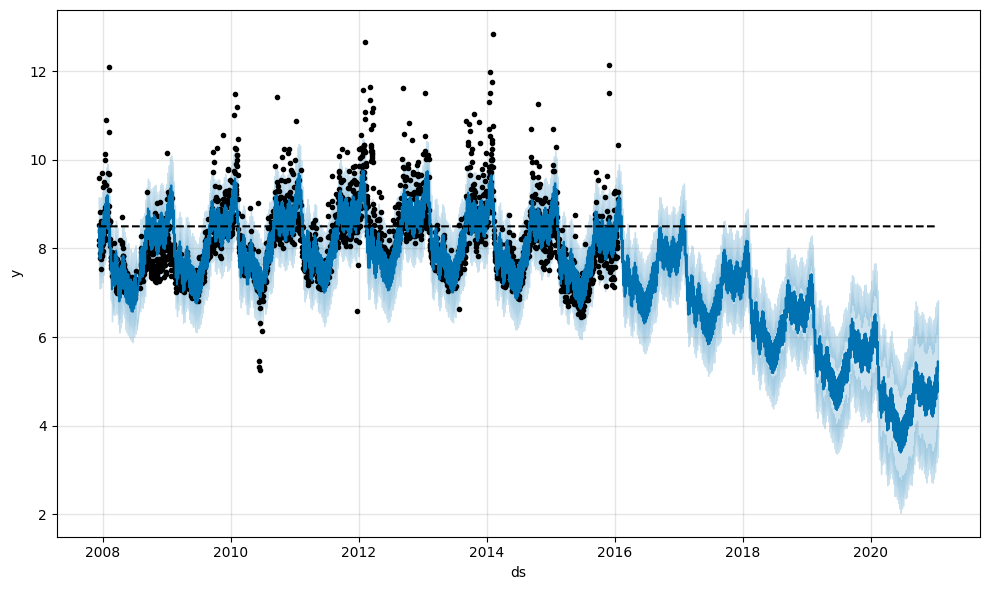

In [6]:
future = m.make_future_dataframe(periods=1826)
future["cap"] = 8.5
fcst = m.predict(future)
fig = m.plot(fcst)